<a href="https://colab.research.google.com/github/aayushkubb/nlp/blob/main/Twitter_Sentiment_Analysis_AV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

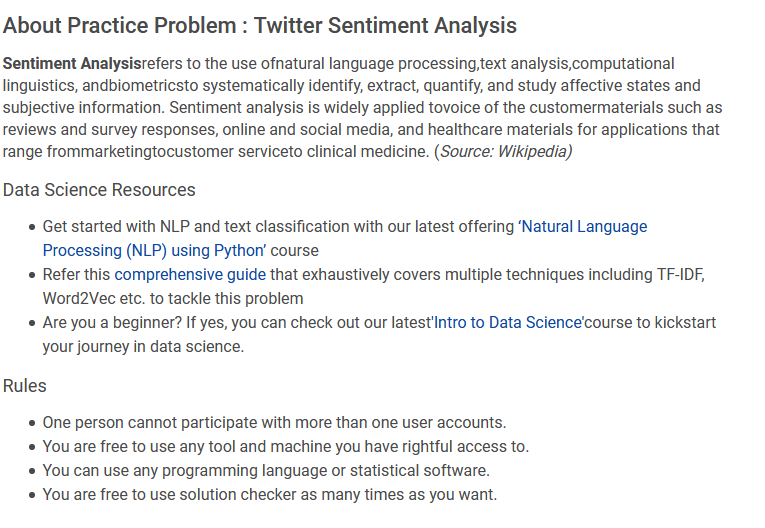

# Download the data

In [1]:
!wget https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv
!wget https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv
!wget https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_gfvA5FD.csv

--2025-02-08 18:44:41--  https://datahack-prod.s3.amazonaws.com/test_file/test_tweets_anuFYb8.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.158.35, 52.219.156.107, 52.219.158.155, ...
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.158.35|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1635543 (1.6M) [text/csv]
Saving to: ‘test_tweets_anuFYb8.csv’

test_tweets_anuFYb8 100%[===================>]   1.56M   332KB/s    in 6.8s    

2025-02-08 18:44:49 (235 KB/s) - ‘test_tweets_anuFYb8.csv’ saved [1635543/1635543]

--2025-02-08 18:44:49--  https://datahack-prod.s3.amazonaws.com/train_file/train_E6oV3lV.csv
Resolving datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)... 52.219.156.163, 16.12.36.71, 52.219.160.47, ...
Connecting to datahack-prod.s3.amazonaws.com (datahack-prod.s3.amazonaws.com)|52.219.156.163|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

# Import

In [2]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
train  = pd.read_csv('train_E6oV3lV.csv')
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [4]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [5]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


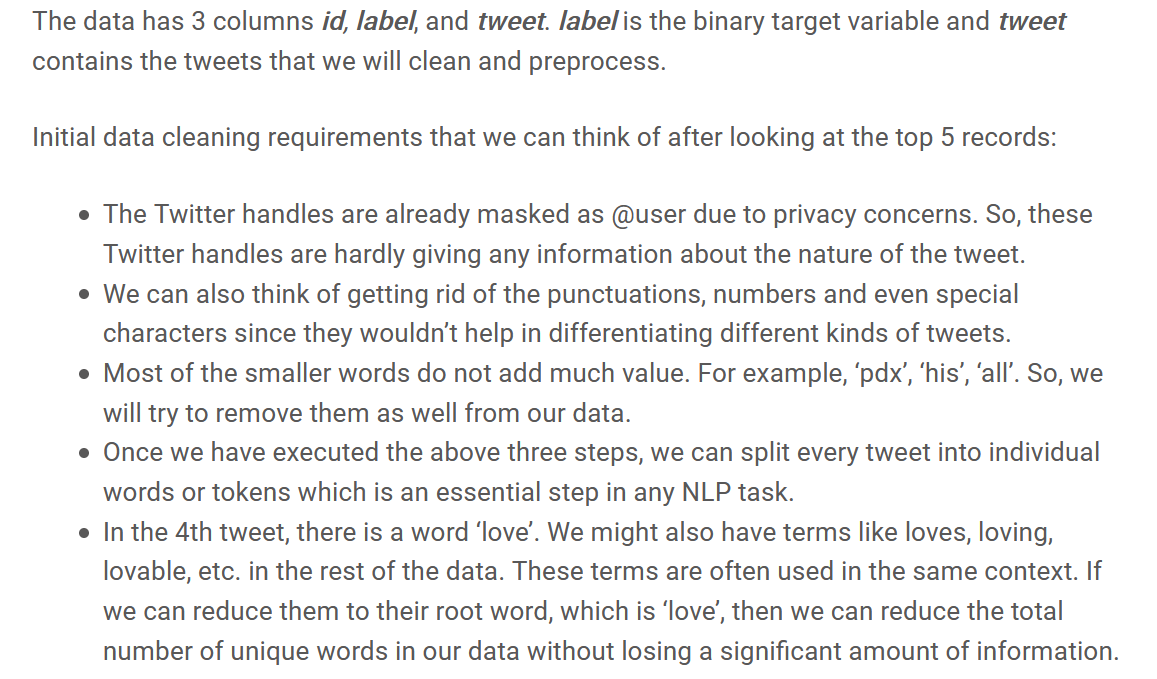

In [6]:
#Negative Tweets
train[train['label']==1].head()

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...


In [7]:
#Positive Tweets
train[train['label']==0].head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


# Quick Analysis

In [8]:
negative_tweets=set(train[train['label']==1]['tweet'].tolist())

In [9]:
counter={}
counter['black']=0
counter['girl']=0
counter['sex']=0
counter['porn']=0
for i in negative_tweets:
  i=i.lower()
  if 'black' in i:
    counter['black']+=1
  if 'girl' in i:
    counter['girl']+=1
  if 'sex' in i:
    counter['sex']+=1
  if 'porn' in i:
    counter['porn']+=1


print("percentage")

percentage


In [10]:
counter

{'black': 154, 'girl': 45, 'sex': 72, 'porn': 24}

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [12]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
#STopwords
Stopwords = set(stopwords.words('english'))
Stopwords.add("@user")
Stopwords.add("user")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


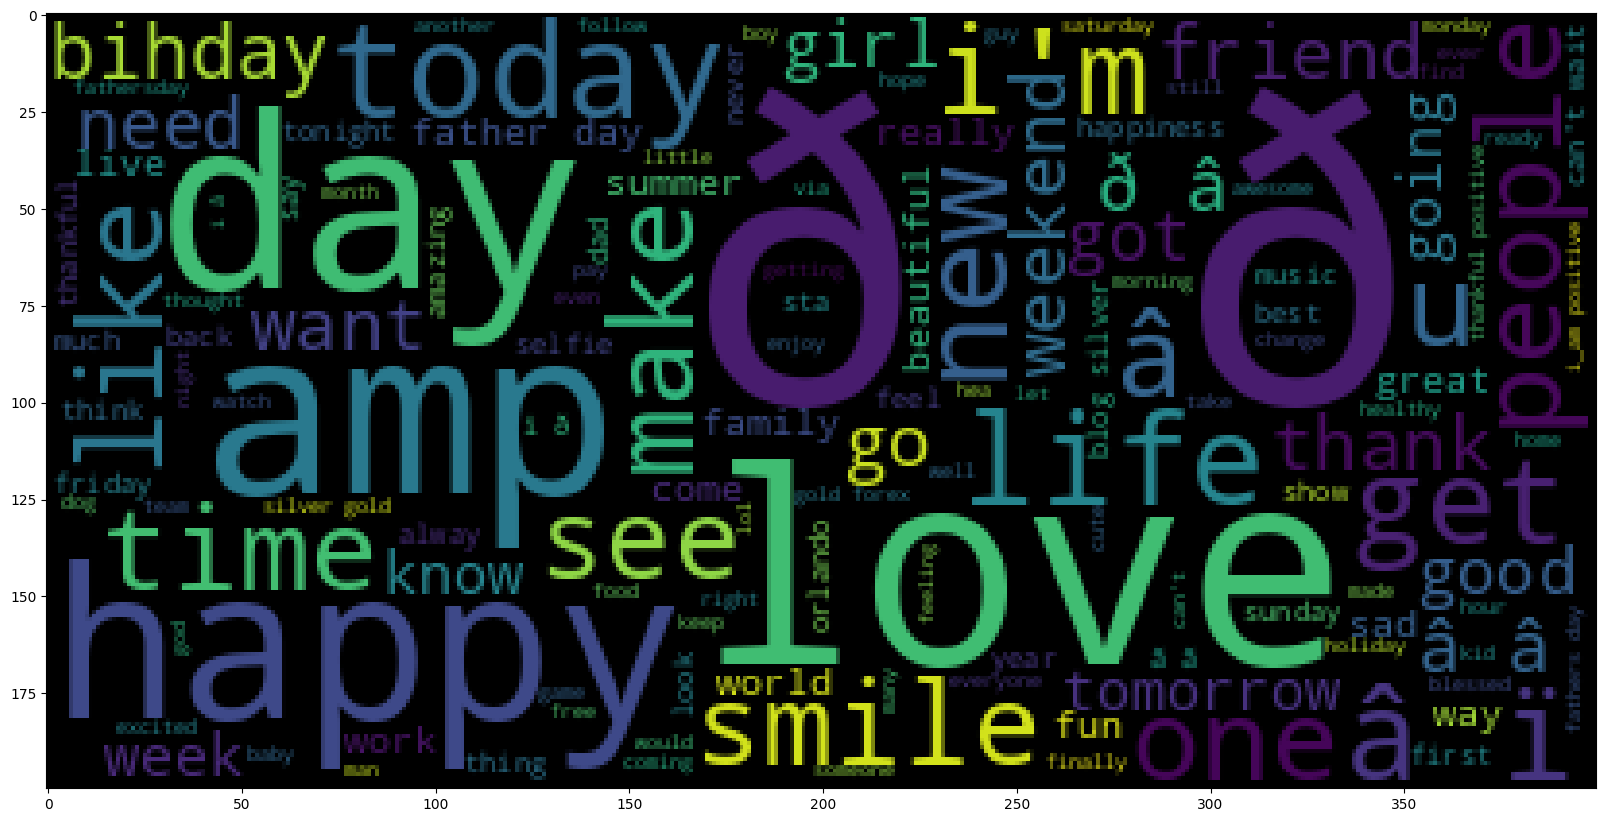

In [13]:
# POSITIVE TWEETS
wc=WordCloud(stopwords=Stopwords).generate(" ".join(set(train[train['label']==0]['tweet'].tolist())))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wc)
plt.show()

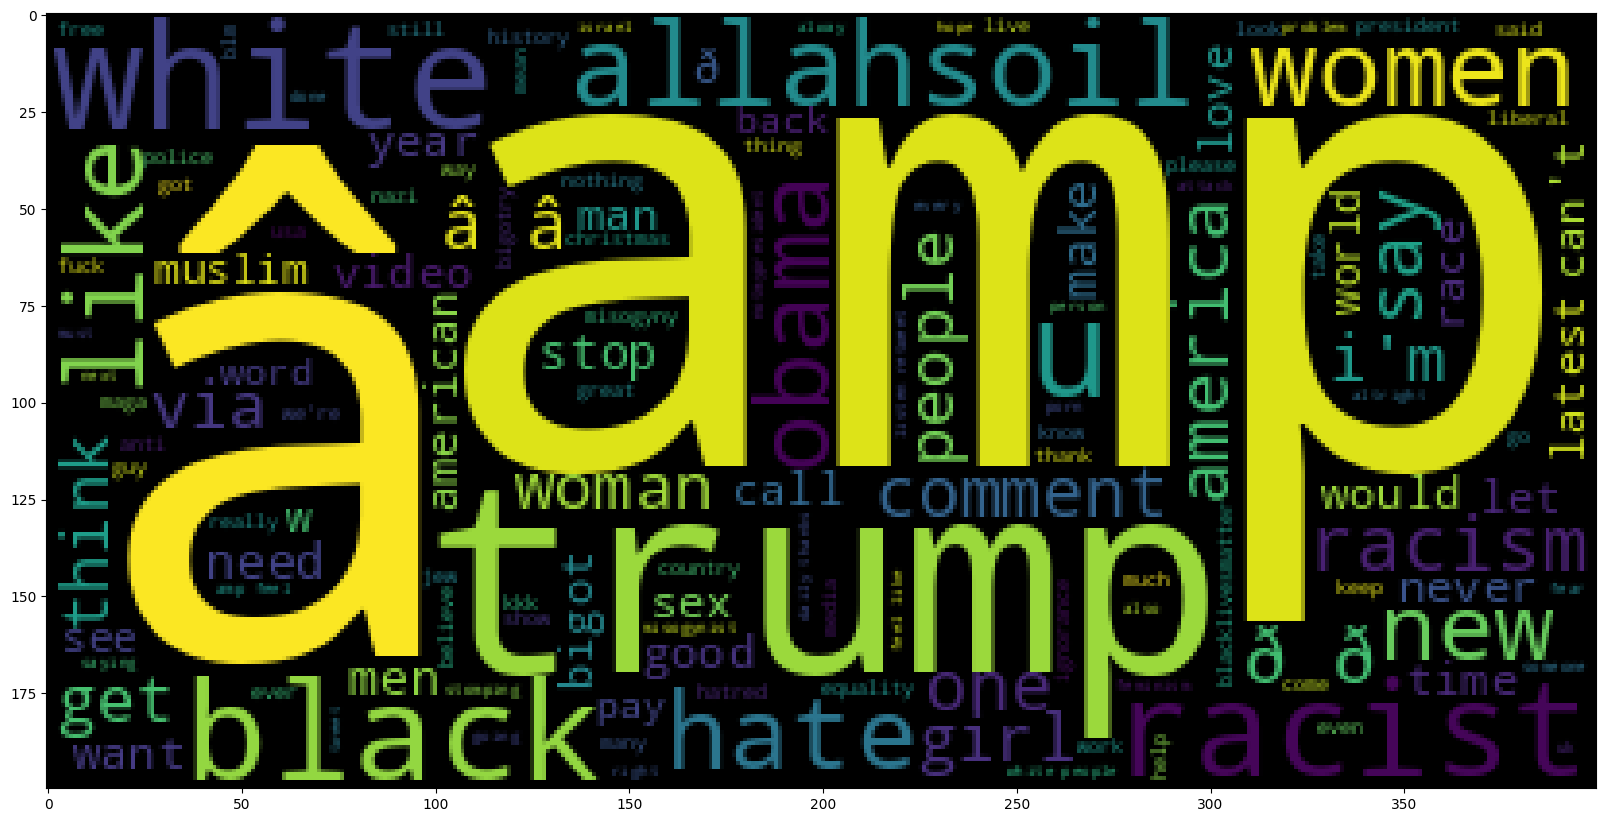

In [14]:
# NEGATIVE TWEETS
wc=WordCloud(stopwords=Stopwords).generate(" ".join(negative_tweets))
fig = plt.figure(1, figsize = (20, 20))
plt.imshow(wc)
plt.show()

# TO-DO

Try to see phrase-clouds rather than word clouds

In [17]:
import pandas as pd

combi = pd.concat([train, test], ignore_index=True)
# Use pd.concat instead of append to combine DataFrames in newer pandas versions.
# ignore_index=True ensures a continuous index in the resulting DataFrame.

In [46]:
train.shape

(31962, 5)

In [47]:
test.shape

(17197, 5)

Given below is a user-defined function to remove unwanted text patterns from the tweets. It takes two arguments, one is the original string of text and the other is the pattern of text that we want to remove from the string. The function returns the same input string but without the given pattern. We will use this function to remove the pattern ‘@user’ from all the tweets in our data.

In [18]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

Now let’s create a new column tidy_tweet, it will contain the cleaned and processed tweets. Note that we have passed “@[\w]*” as the pattern to the remove_pattern function. It is actually a regular expression which will pick any word starting with ‘@’.

In [19]:
def remove_pattern(input_txt):
    return re.sub("@[\w]*","",input_txt)

In [20]:
all_user_tags=[]
for i in  combi['tweet']:
  for j in i.split():
    if "@" in j:
      all_user_tags.append(j)

In [21]:
set(all_user_tags)

{'"@user',
 '##@user',
 '#@user',
 '#beers@user',
 '#chiefð\x9f\x8d·@user',
 '#family#fun@user',
 '#ffâ\x98\x80â\x98\x80â\x98\x80@user',
 '#friendð\x9f\x92\x93@user',
 '#friendð\x9f\x92\x93anað\x9f\x92\x93@user',
 '#gmorningâ\x98\x95ð\x9f\x8d©#lusciousð\x9f\x8c¹ð\x9f\x8e\x80@user',
 '#greattimewith@user',
 '#guv@user',
 '#harrypotterweekendð\x9f\x98\x8dð\x9f\x92\x98â\x9a¡ð\x9f\x92\x95@user',
 '#look@user',
 '#myfit@user',
 '#pretty@user',
 '#quotes@user',
 '#scared@user',
 '#shabbatshalom×§×§ã\x80\x80@user',
 '#thithi(@user',
 '#unlimited....@user',
 '#wonthedoit.....@user',
 '&amp;@user',
 "'@user",
 '\'ed"@user',
 '(((@user',
 '(@',
 '(@user',
 ',@user',
 '-@user',
 '...@user',
 '..@user',
 '.@user',
 '//@user',
 '/@user',
 ':@',
 '==&gt;@user',
 '@',
 '@user',
 'after@user',
 'again......@user',
 'am#very@',
 'ambassador@user',
 'back@user',
 'bad!@user',
 'bd!ð\x9f\x8e\x89ð\x9f\x8e\x82ð\x9f\x8e\x88@user',
 'beauty@user',
 'bihday!@user',
 'bihday@user',
 'bro@user',
 'by:@user',
 '

In [23]:
import re
import numpy as np

def remove_pattern(input_txt, pattern="@[\w]*"): # Define pattern as a default argument
    return re.sub(pattern, "", input_txt)

# remove twitter handles (@user)
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet']) # Call with only the 'tweet' column

In [24]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [25]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [26]:
# combi['tidy_tweet'].apply(lambda x: " ".join([i for i in x.split() if len(i)<=3 ]))

# Get popular hashtags

In [27]:
from collections import Counter

def get_popular_hashtags(text):
  hashtags=[]
  for i in text:
    for word in i.split():
      if "#" in word:
        hashtags.append(word)

  cc=Counter(hashtags)

  return cc


In [28]:
negative_hashtags=get_popular_hashtags(combi.loc[combi['label']==1,'tidy_tweet'])
positive_hashtags=get_popular_hashtags(combi.loc[combi['label']==0,'tidy_tweet'])

In [29]:
negative_hashtags.most_common(10)

[('#trump', 119),
 ('#politics', 94),
 ('#allahsoil', 92),
 ('#libtard', 76),
 ('#liberal', 75),
 ('#sjw', 74),
 ('#retweet', 57),
 ('#black', 44),
 ('#miamiâ\x80¦', 38),
 ('#tampa', 32)]

In [30]:
positive_hashtags.most_common(10)

[('#love', 1439),
 ('#positive', 870),
 ('#healthy', 556),
 ('#smile', 514),
 ('#thankful', 464),
 ('#fun', 410),
 ('#life', 376),
 ('#affirmation', 362),
 ('#model', 360),
 ('#blog', 343)]

# Baseline Models

In [38]:
negative_words=[i[0] for i  in negative_hashtags.most_common(10)]

In [39]:
# negative_words.extend([re.sub("#","",i) for i in negative_words])
negative_words=set(negative_words)

In [40]:
def baseline_model(tweet):
  tweet=set(tweet.split())
  if len(tweet.intersection(negative_words))>0:
    return 1
  else:
    return 0

In [41]:
combi['predictions']=combi['tidy_tweet'].apply(lambda x: baseline_model(x))

In [48]:
#Split the data back to train and test
train=combi.loc[:31961]
test=combi[combi['label'].isnull()]

In [49]:
test.shape

(17197, 5)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(train['label'],train['predictions']))

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     29720
         1.0       0.79      0.16      0.27      2242

    accuracy                           0.94     31962
   macro avg       0.86      0.58      0.62     31962
weighted avg       0.93      0.94      0.92     31962



## Baseline Submissions

In [52]:
submission=test.loc[:,['id','predictions']]
submission.rename(columns={'predictions':'label'},inplace=True)
submission.to_csv("baseline_submission.csv",index=False)

With baseline i got a score of .46

# Data Preprocessing
Lets relook at the clean data now

You can see the difference between the raw tweets and the cleaned tweets (tidy_tweet) quite clearly. Only the important words in the tweets have been retained and the noise (numbers, punctuations, and special characters) has been removed.

## Tokenization
Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens

In [53]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunctional, selfish, drags, ..."
1,"[thanks, #lyft, credit, can't, cause, they, do..."
2,"[bihday, your, majesty]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, society, #motivation]"


# Stemming

Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [54]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

,tidy_tweet
0,"[when, father, dysfunct, selfish, drag, kid, i..."
1,"[thank, #lyft, credit, can't, caus, they, don'..."
2,"[bihday, your, majesti]"
3,"[#model, love, take, with, time, urð±!!!, ð..."
4,"[factsguide:, societi, #motiv]"


In [55]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

# Story Generation and Visualization from Tweets

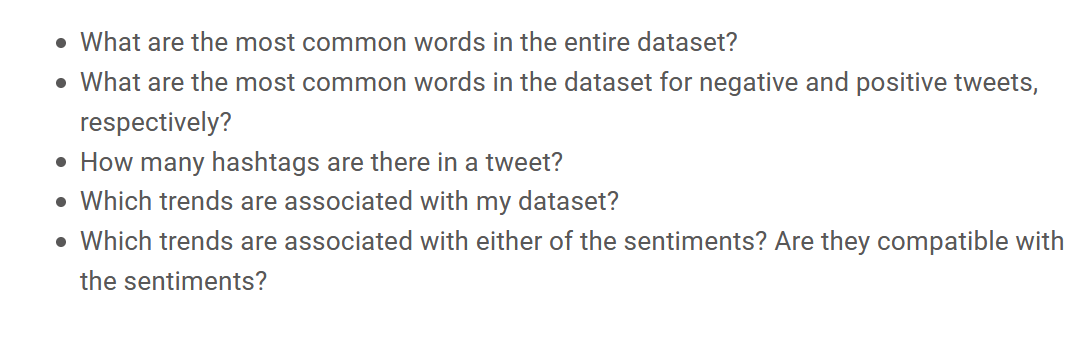

## WORDCLOUDS

A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

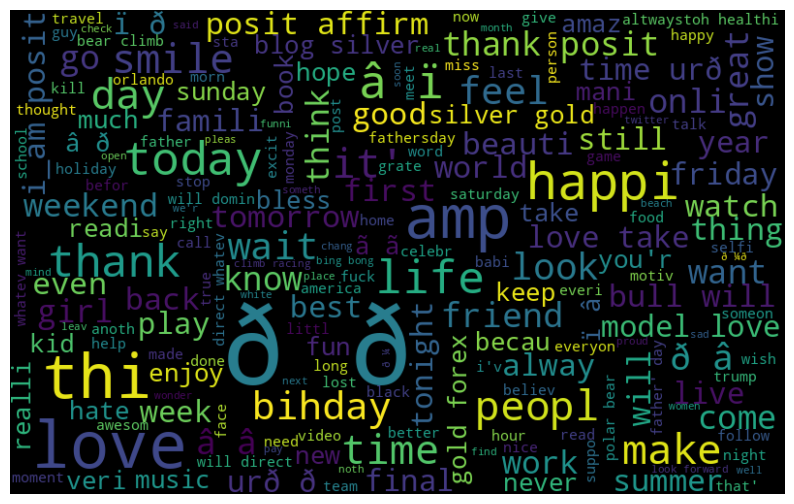

In [56]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy and love being the most frequent ones. It doesn’t give us any idea about the words associated with the racist/sexist tweets. Hence, we will plot separate wordclouds for both the classes(racist/sexist or not) in our train data.

## Words in non racist/sexist tweets

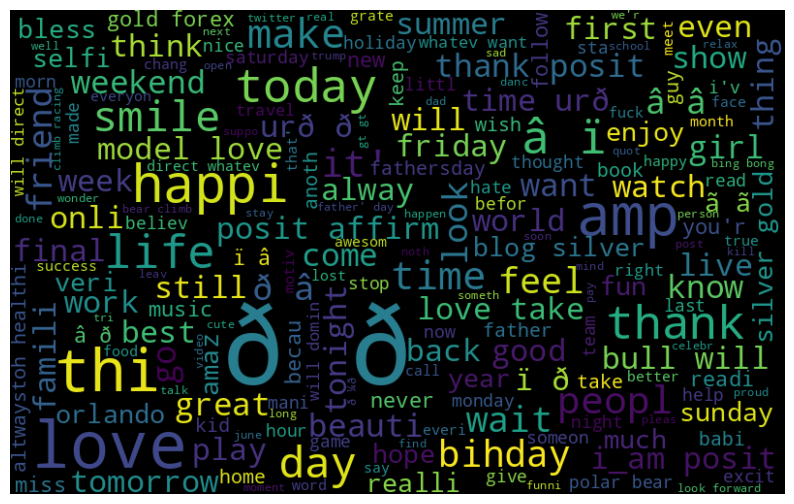

In [57]:
normal_words =' '.join([text for text in combi['tidy_tweet'][combi['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

We can see most of the words are positive or neutral. With happy, smile, and love being the most frequent ones. Hence, most of the frequent words are compatible with the sentiment which is non racist/sexists tweets. Similarly, we will plot the word cloud for the other sentiment. Expect to see negative, racist, and sexist terms.

## Racist/Sexist Tweets

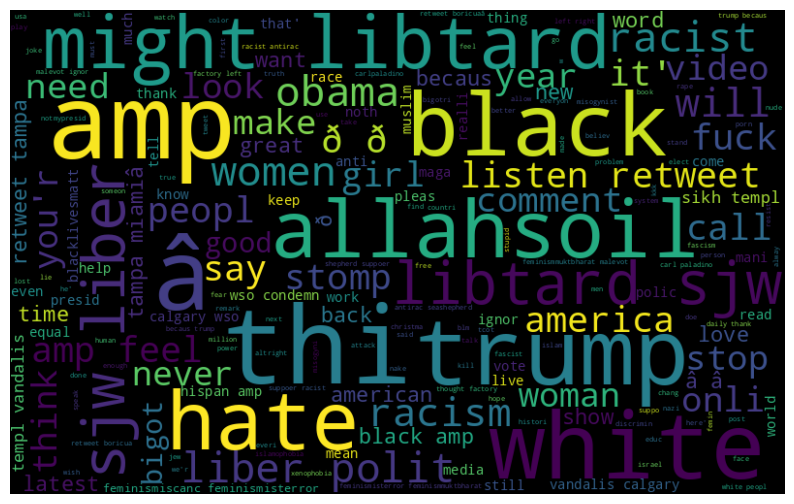

In [58]:
negative_words = ' '.join([text for text in combi['tidy_tweet'][combi['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

As we can clearly see, most of the words have negative connotations. So, it seems we have a pretty good text data to work on. Next we will the hashtags/trends in our twitter data.


 ## Understanding the impact of Hashtags on tweets sentiment

 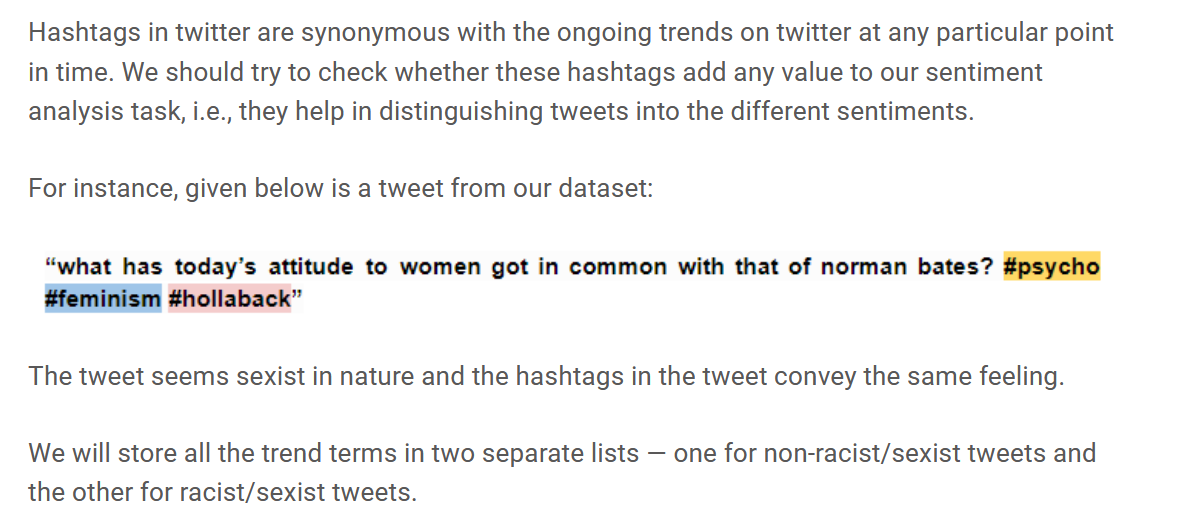

In [59]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [60]:
# extracting hashtags from non racist/sexist tweets

HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

## Non-Racist/Sexist Tweets

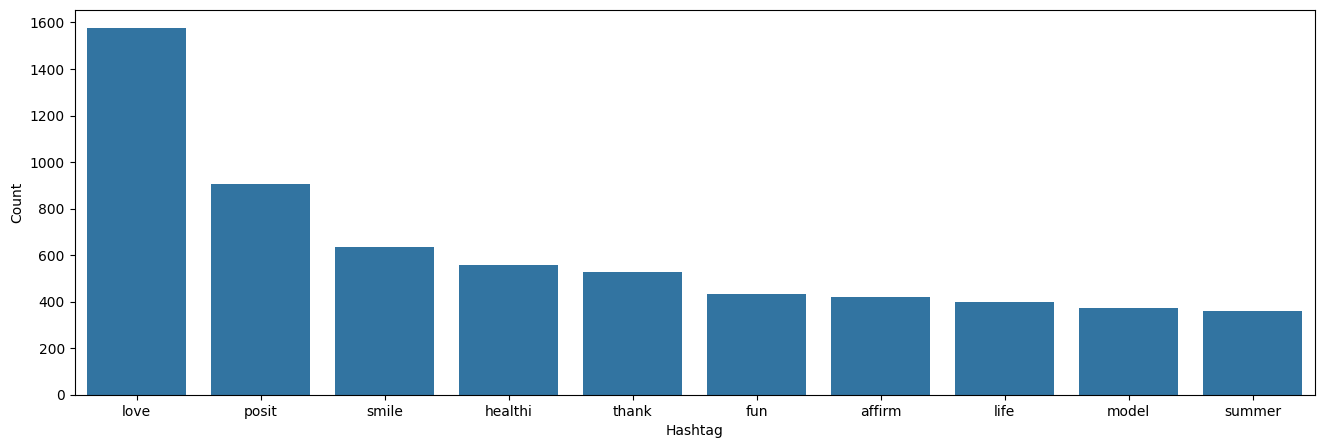

In [61]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags
d = d.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

## Racist/Sexist Tweets

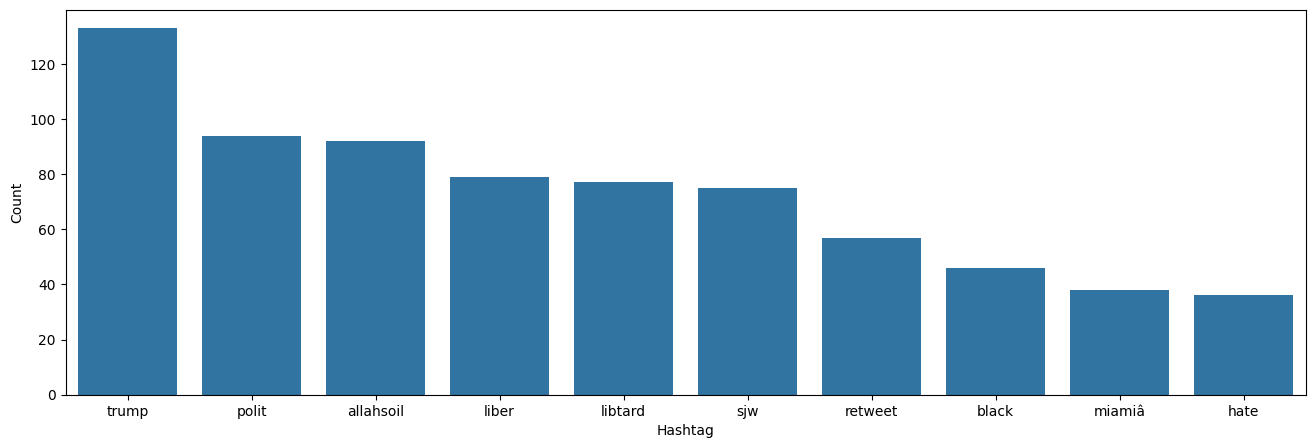

In [62]:
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

As expected, most of the terms are negative with a few neutral terms as well. So, it’s not a bad idea to keep these hashtags in our data as they contain useful information. Next, we will try to extract features from the tokenized tweets.

## Extracting Features from Cleaned Tweets

To analyze a preprocessed data, it needs to be converted into features. Depending upon the usage, text features can be constructed using assorted techniques – Bag-of-Words, TF-IDF, and Word Embeddings. In this article, we will be covering only Bag-of-Words and TF-IDF.


## Bag-of-Words Features

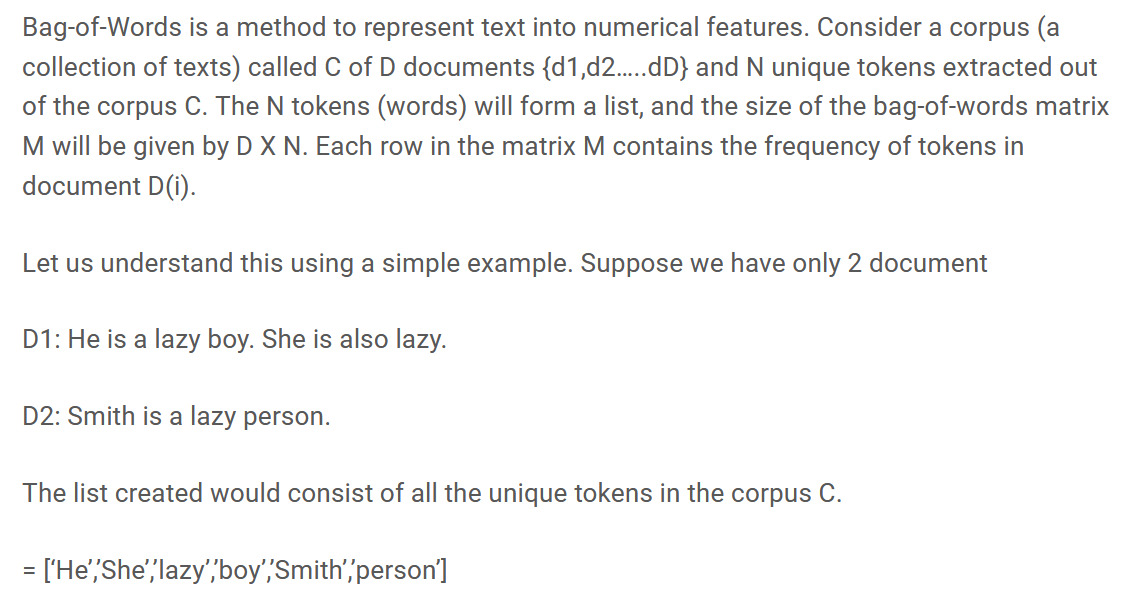

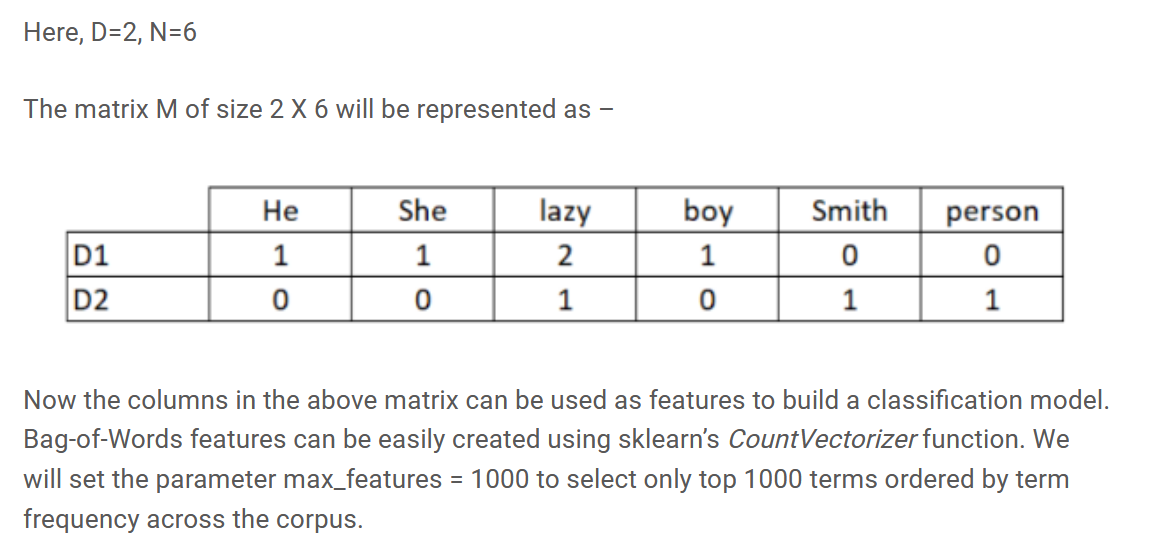

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# bag-of-words feature matrix
bow = bow_vectorizer.fit_transform(combi['tidy_tweet'])

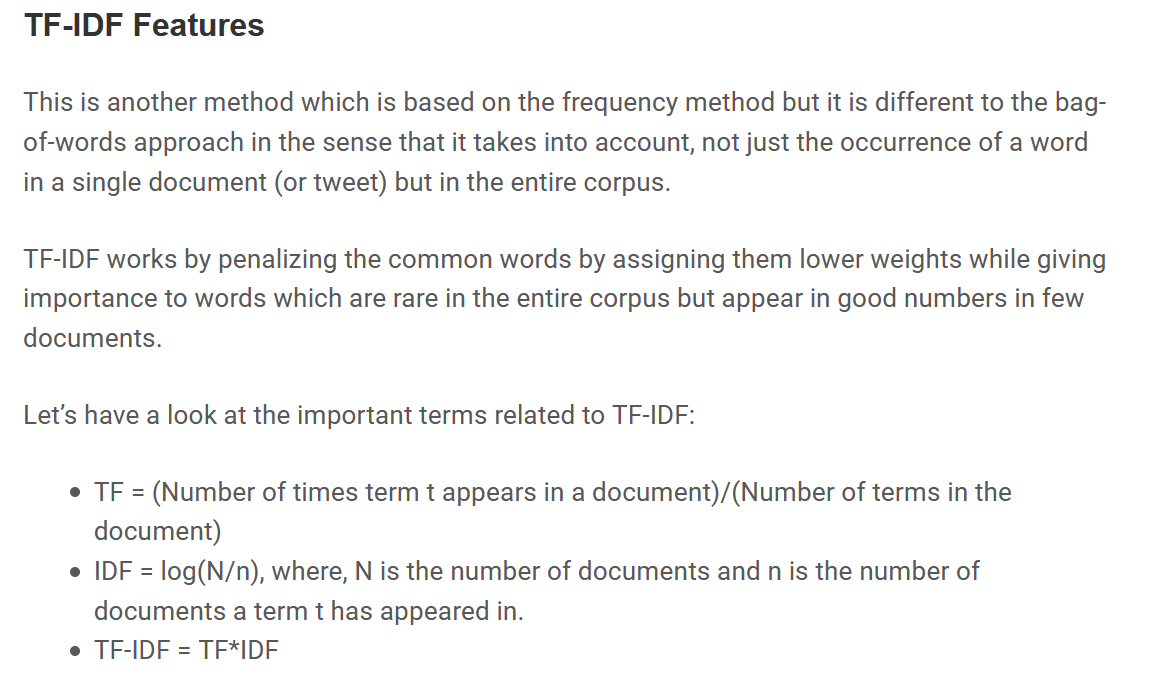

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')
# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

#  Model Building: Sentiment Analysis

We are now done with all the pre-modeling stages required to get the data in the proper form and shape. Now we will be building predictive models on the dataset using the two feature set — Bag-of-Words and TF-IDF.

We will use logistic regression to build the models. It predicts the probability of occurrence of an event by fitting data to a logit function.


## Building model using Bag-of-Words features

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

train_bow = bow[:31962,:]
test_bow = bow[31962:,:]

# splitting data into training and validation set
xtrain_bow, xvalid_bow, ytrain, yvalid = train_test_split(train_bow, train['label'], random_state=42, test_size=0.3)

lreg = LogisticRegression()
lreg.fit(xtrain_bow, ytrain) # training the model

prediction = lreg.predict_proba(xvalid_bow) # predicting on the validation set
prediction_int = prediction[:,1] >= 0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int = prediction_int.astype(int) # Use int instead of np.int

f1_score(yvalid, prediction_int) # calculating f1 score
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8905
         1.0       0.62      0.49      0.55       684

    accuracy                           0.94      9589
   macro avg       0.79      0.73      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [68]:
# Let's make a submission
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_bow.csv', index=False) # writing data to a CSV file

<ipython-input-68-25e01fa0771e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = test_pred_int


## Building model using TF-IDF features

In [70]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]

lreg.fit(xtrain_tfidf, ytrain)

prediction = lreg.predict_proba(xvalid_tfidf)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)

f1_score(yvalid, prediction_int)
print(classification_report(yvalid, prediction_int))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8905
         1.0       0.67      0.46      0.54       684

    accuracy                           0.94      9589
   macro avg       0.81      0.72      0.76      9589
weighted avg       0.94      0.94      0.94      9589



In [72]:
# Let's make a submission
test_pred = lreg.predict_proba(test_bow)
test_pred_int = test_pred[:,1] >= 0.3
test_pred_int = test_pred_int.astype(int)
test['label'] = test_pred_int
submission = test[['id','label']]
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file

<ipython-input-72-478815f5a04a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['label'] = test_pred_int


# Use SVM

In [73]:
from sklearn.svm import SVC
svm=SVC()

In [74]:
train_tfidf = tfidf[:31962,:]
test_tfidf = tfidf[31962:,:]

xtrain_tfidf = train_tfidf[ytrain.index]
xvalid_tfidf = train_tfidf[yvalid.index]
svm.fit(xtrain_tfidf, ytrain)

prediction = svm.predict(xvalid_tfidf)

f1_score(yvalid, prediction)
print(classification_report(yvalid, prediction))



              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8905
         1.0       0.82      0.35      0.49       684

    accuracy                           0.95      9589
   macro avg       0.89      0.67      0.73      9589
weighted avg       0.94      0.95      0.94      9589



In [ ]:

# Let's make a submission
test['label'] = svm.predict(test_bow)
submission = test[['id','label']]
submission.to_csv('sub_svm_tfidf.csv', index=False) # writing data to a CSV file